# Lab: Clustering MNIST

Use a small, low resolution subset of the MNIST data set to compare K-Means and Spectral clustering algorithms.

In [1]:
# get the data

import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [2]:
import matplotlib.pyplot as plt

1


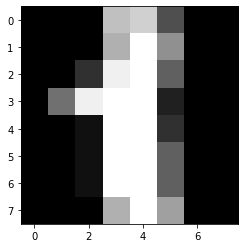

In [3]:
plt.gray()
plt.imshow(data[1,:].reshape(8,8))
print(labels[1])

## Task 1
* create train and test sets
* cluster the train set using [**K-MEANS**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) and [**Spectral Clustering**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering) using *k=10*
* evaluate the clustering results on test using the 
    * [silouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)
    * [Fowlkes-Mallows score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html#sklearn.metrics.fowlkes_mallows_score)

In [4]:
%%time
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0, n_jobs=-1).fit(data)

CPU times: user 513 ms, sys: 15.5 ms, total: 528 ms
Wall time: 264 ms


/home/keuper/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


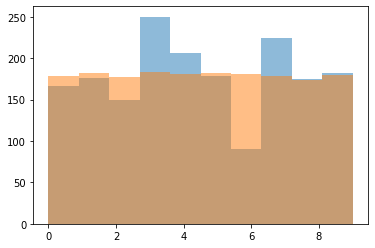

In [5]:
_ = plt.hist(kmeans.labels_, alpha=0.5)
_ = plt.hist(labels, alpha=0.5)

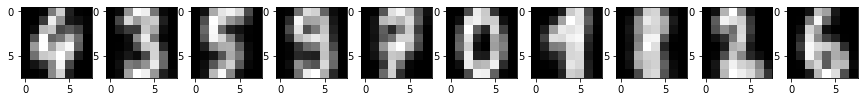

In [6]:
fig, ax = plt.subplots(1, 10, figsize=(15,15))
for i in range(10):
  _=ax[i].imshow(kmeans.cluster_centers_[i,:].reshape(8,8))

In [7]:
%%time
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=10,random_state=0,affinity='nearest_neighbors').fit(data)

CPU times: user 730 ms, sys: 32.5 ms, total: 762 ms
Wall time: 238 ms


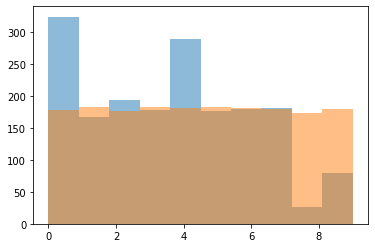

In [8]:
_ = plt.hist(clustering.labels_, alpha=0.5)
_ = plt.hist(labels, alpha=0.5)

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
silhouette_score(data, kmeans.labels_)

0.18251916424600556

In [11]:
silhouette_score(data, clustering.labels_)

0.18272860285856599

## Task 2
* find the best *k* (in terms of the scoring) for *K-Means* and *Spectral Clustering*


In [12]:
import numpy as np
res=[]
for k in range(10,30):
  kmeans = KMeans(n_clusters=k, random_state=0, n_jobs=-1).fit(data)
  res.append(silhouette_score(data, kmeans.labels_))



/home/keuper/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/home/keuper/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/home/keuper/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/home/keuper/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
/home/keuper/anaconda3/lib/python3.7

In [13]:
np.argmax(res)

5

In [14]:
res[6]

0.19004086149894478

## Task 3
* visualize the best clusters from task 2 with the [embedding projector](http://projector.tensorflow.org/)

In [53]:
np.savetxt('data.tsv', data,delimiter='\t')

In [54]:
np.savetxt('labels.tsv', kmeans.labels_,delimiter='\t')